Normal Equation
$$X = \begin{bmatrix}
    x_{11} & x_{12} & \dots  & x_{1m} \\
    x_{21} & x_{22} & \dots  & x_{2m} \\
    \vdots & \vdots & \ddots & \vdots \\
    x_{n1} & x_{n2} & \dots  & x_{nm}
    \end{bmatrix},
w = \begin{bmatrix}
    w_{1} \\
    w_{2} \\
    \vdots \\
    w_{m}
    \end{bmatrix}$$
    
$$\hat{Y} = X * w$$

$$MSE = \frac{1}{n} * \|\hat{Y} - Y\|^2_{2}$$

$$\nabla_{w}MSE = \nabla_{w} \frac{1}{n} * \|\hat{Y} - Y\|^2_{2}$$

$$=\frac{1}{n} * \nabla_{w} \|\hat{Y} - Y\|^2_{2}$$

$$=\frac{1}{n} * \nabla_{w} \|X * w - Y\|^2_{2}$$

$$=\frac{1}{n} * \nabla_{w} (X * w - Y)^{T} * (X * w - Y)$$

$$=\frac{1}{n} * \nabla_{w} (w^{T} * X^{T} - Y^{T}) * (X * w - Y)$$

$$=\frac{1}{n} * \nabla_{w} (w^{T}X^{T}Xw - w^{T}X^{T}Y - Y^{T}Xw + Y^{T}Y)$$

$$=\frac{1}{n} * \nabla_{w} (w^{T}X^{T}Xw - w^{T}X^{T}Y - w^{T}X^{T}Y + Y^{T}Y)$$

$$=\frac{1}{n} * \nabla_{w} (w^{T}X^{T}Xw - 2w^{T}X^{T}Y + Y^{T}Y)$$

$$=\frac{1}{n} * (2X^{T}Xw - 2X^{T}Y)= 0$$

$$X^{T}Xw = X^{T}Y$$

$$w = (X^{T}X)^{-1}X^{T}Y$$

Regularization
$$L(X, Y, w) = \frac{1}{2} * \|X * w - Y\|^2_{2} + \frac{\alpha}{2} * \|w\|^2_{2}$$

$$= \frac{1}{2} * \|X * w - Y\|^2_{2} + \frac{\alpha}{2} * w^{T}w$$

$$\nabla_{w}L(X, Y, w) = \nabla_{w}(\frac{1}{2} * \|X * w - Y\|^2_{2} + \frac{\alpha}{2} * w^{T}w)$$

$$=X^{T}Xw - X^{T}Y + \alpha * w = 0$$

$$X^{T}Xw + \alpha * I * w = X^{T}Y$$

$$(X^{T}X + \alpha I) * w = X^{T}Y$$

$$w = (X^{T}X + \alpha I)^{-1}X^{T}Y$$

Gradient Descent
$$while\,L(X, Y, w) = \frac{1}{n} * \|X * w - Y\|^2_{2} >= \delta$$
$$w = w - \epsilon * \nabla_{w}L(X, Y, w) = w - \epsilon * \frac{1}{n} * (2X^{T}Xw - 2X^{T}Y)$$

In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
start = dt.datetime(1970, 1, 1)
end = dt.datetime(2020, 7, 26)
data = web.DataReader("SPY", "yahoo", start, end)

In [3]:
print(data.head())

                High       Low      Open     Close     Volume  Adj Close
Date                                                                    
1993-01-29  43.96875  43.75000  43.96875  43.93750  1003200.0  26.184059
1993-02-01  44.25000  43.96875  43.96875  44.25000   480500.0  26.370279
1993-02-02  44.37500  44.12500  44.21875  44.34375   201300.0  26.426161
1993-02-03  44.84375  44.37500  44.40625  44.81250   529400.0  26.705482
1993-02-04  45.09375  44.46875  44.96875  45.00000   531500.0  26.817228


In [4]:
df = pd.DataFrame(data, columns=["Close", "Volume"])
df = df.reset_index()
train = df[df["Date"] < "2017-01-01"]
test = df[df["Date"] >= "2017-01-01"]

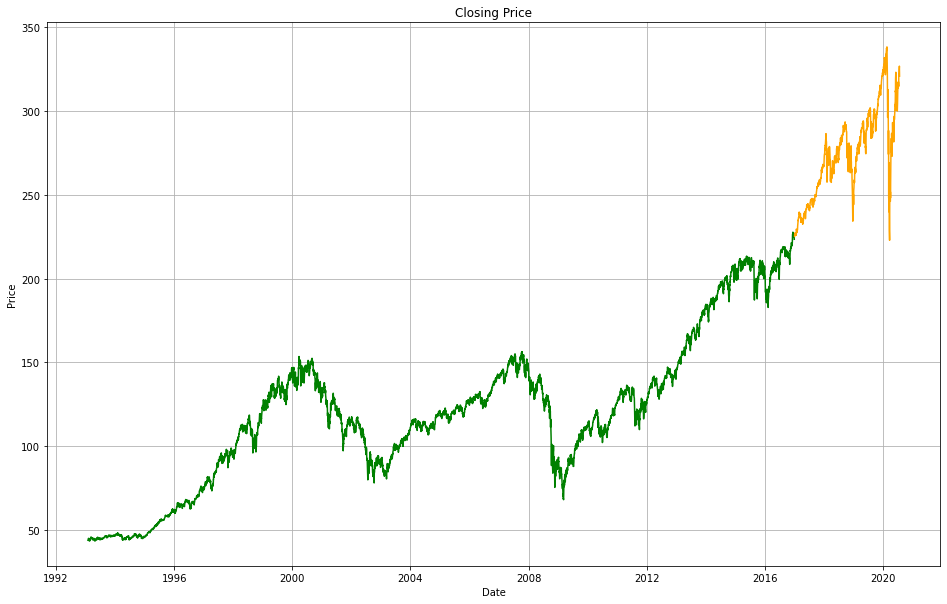

In [5]:
plt.figure(figsize=(16,10))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(train['Date'], train['Close'], 'green', label = 'Train data')
plt.plot(test['Date'], test['Close'], 'orange', label = 'Test data')
plt.title('Closing Price')
plt.show()

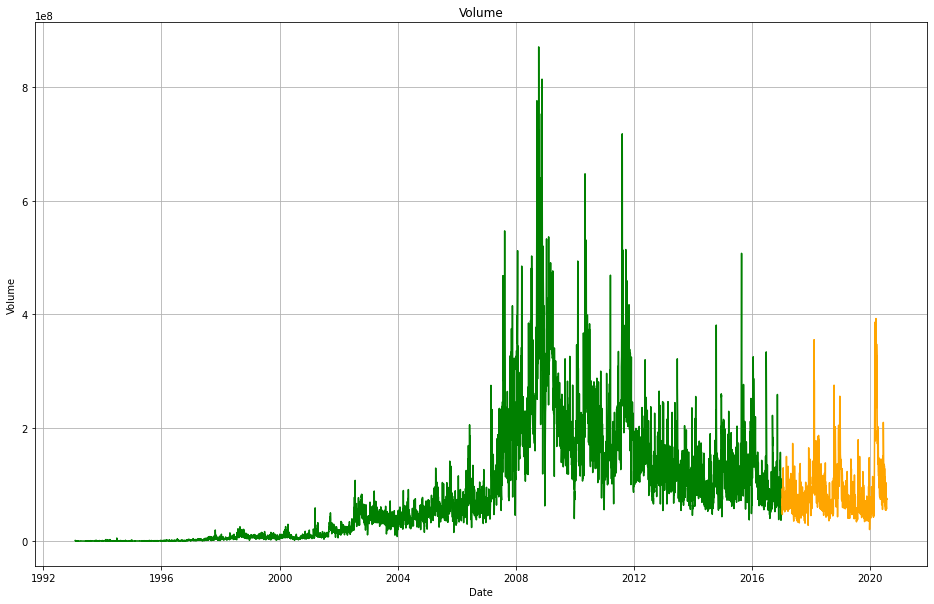

In [6]:
plt.figure(figsize=(16, 10))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.plot(train['Date'], train['Volume'], 'green', label = 'Train data')
plt.plot(test['Date'], test['Volume'], 'orange', label = 'Test data')
plt.title('Volume')
plt.show()

In [7]:
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

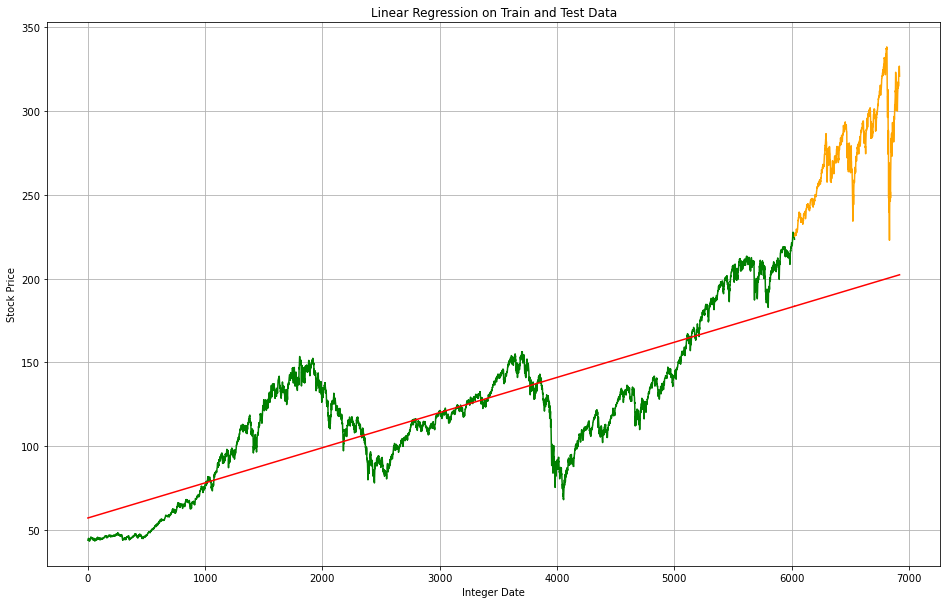

In [9]:
plt.figure(figsize=(16,10))
plt.grid(True)
plt.title('Linear Regression on Train and Test Data')
plt.plot(X_train, y_train, "green")
plt.plot(X_test, y_test, "orange")
plt.plot(X_train, model.predict(X_train), 'red')
plt.plot(X_test, model.predict(X_test), 'red')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.show()